<a href="https://colab.research.google.com/github/ahmedyunis/Data-Analysis-using-Python/blob/main/Food_Basic_Task1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Python Backages and Libraries required for Investigation and analysis 
from pathlib import Path
import sys
import  numpy as np 
import pandas as pd
import pandas_profiling as pdf 
import matplotlib.pyplot as plt  
import  seaborn as  sns 
%matplotlib inline

#libararies for working in EXCEL
import openpyxl

#DateTime Library
from datetime import timedelta
from datetime import datetime as dt

# **Load Excel Sheet**

The Excel Workbook contains 5 different sheets,
some of them contains many columns and data not useful to be used to get a highlight and ternds within the data  

**Orders Sheet** : Order_hid, source, Type, Final Price, delay seconds, branch name 

**Order Tags** : slug, branch name.

**Order Product** : Original Price, Final Price, Cost, Quantity

**Order Product Options** : Order Product Option Name, Price , Quantity 

**Order Payment** : amount, Payment Method 




In [ ]:
filename = "First Sheet.xlsx"
wb = openpyxl.load_workbook(filename)

#Accessing the WorkSheet on Excel need to be edited
Orders_Sheet = wb['Orders']
Order_Tags = wb['Order Tags']
Order_Product = wb['Order Product']
Order_Options = wb['Order Product Options']
Order_Payments = wb['Order Payments']



**Notice** Each Sheet Contains at the Top the **Restaurant Name** Concatenated With the *Name* of the Sheet and the **Business Date** 


# Get Business Date

In [ ]:
#Print Out the Cell Value
Business_Date = Orders_Sheet.cell(4, 2).value.split(' ')[0]
print(Business_Date)

2020-11-11


# Get Restaurant Name

In [ ]:
Restaurant = Orders_Sheet.cell(1, 1).value.split(' ')[0]
print(Restaurant)

Hamburgini


**Delete the 6 Rows at the Top of each sheet**

In [ ]:
#Delete the first 6 Rows 
Orders_Sheet.delete_rows(1,6)


In [ ]:
Order_Tags.delete_rows(1,6)
Order_Product.delete_rows(1,6)
Order_Options.delete_rows(1,6)
Order_Payments.delete_rows(1,6)


Convert the remain of the Sheets to DataFrame Without the empty rows 

In [ ]:
#Get the values of the  Orders Sheet 
Orders_Sheet = Orders_Sheet.values

In [ ]:
# Get the first line in file as a header line
headers = next(Orders_Sheet)[0:]

In [ ]:
#Create a DataFrame Based on the data  in Order Sheet 
df_Orders_Sheet = pd.DataFrame(Orders_Sheet, columns=headers)

In [ ]:
#view the first Columns of the dataframe 
df_Orders_Sheet.head()

order_hid agent_hid cashier_hid waiter_hid driver_hid customer_hid  \
0  _22g9882a36      None   _74113a17       None       None         None   
1  _22g9885641      None   _74113a17       None       None    _12695951   
2  _ad5g4423a9      None   _74113a17       None       None         None   
3  _18adgg5g8d      None   _74113a17       None       None    _7adg3156   
4  _8ga399add5      None   _74113a17       None       None         None   

  application_hid branch_hid device_hid discount_hid  ... waiter name  \
0            None  _96764a78  _9676aa57         None  ...        None   
1            None  _96764a78  _9676aa57         None  ...        None   
2            None  _96764a78  _9676aa57         None  ...        None   
3            None  _96764a78  _9676aa57         None  ...        None   
4            None  _96764a78  _9676aa57         None  ...        None   

  customer name customer phone customer email         device name  \
0          None           None           None  Al-Malqa Cashier 1   
1        Faisal      599388606           None  Al-Malqa Cashier 1   
2          None           None           None  Al-Malqa Cashier 1   
3          محمد      560628542           None  Al-Malqa Cashier 1   
4          None           None           None  Al-Malqa Cashier 1   

  discount name table name kitchen times                 created_at  \
0          None       None            [] 2020-11-11 13:40:17.000000   
1          None       None            [] 2020-11-11 13:43:22.000000   
2          None       None            [] 2020-11-11 13:49:53.999996   
3          None       None            [] 2020-11-11 13:57:32.999996   
4          None       None            [] 2020-11-11 13:59:31.000001   

                  updated_at  
0 2020-11-11 14:03:24.999998  
1 2020-11-11 14:03:32.999999  
2 2020-11-11 14:57:09.999999  
3 2020-11-11 14:57:12.999997  
4 2020-11-11 14:57:18.000000  

[5 rows x 56 columns]

In [ ]:
#Get the values of the  Order_Tags Sheet 
Order_Tags = Order_Tags.values
# Get the first line in file as a header line
headers = next(Order_Tags)[0:]
#Create a DataFrame Based on the data  in Order_Tags Sheet 
df_Order_Tags = pd.DataFrame(Order_Tags, columns=headers)
#view the first Columns of the dataframe 
df_Order_Tags.head()

order_hid    tag_hid               slug branch name  \
0  _416846514g  _671a8867            Walk-IN   Al Murooj   
1  _95g39695a6  _16715278  HungerStation-App   Al Murooj   
2  _22g948da1g  _671a8867            Walk-IN   Al Murooj   
3  _6ad8319d42  _671a8867            Walk-IN   Al Murooj   
4  _3a4813a1a8  _16718d97          iOS-Order   Al Murooj   

                  created_at                 updated_at   NaN   NaN   NaN  \
0 2020-11-11 12:48:17.000001 2020-11-11 12:52:25.999997  None  None  None   
1 2020-11-11 19:02:30.000002 2020-11-11 19:09:47.999998  None  None  None   
2 2020-11-11 19:05:04.000001 2020-11-11 19:09:50.999996  None  None  None   
3 2020-11-11 19:05:47.999996 2020-11-11 19:09:53.000001  None  None  None   
4 2020-11-11 19:08:25.999996 2020-11-11 20:31:08.000000  None  None  None   

    NaN   NaN  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None

In [ ]:
#Get the values of the  Order_Product Sheet 
Order_Product = Order_Product.values
# Get the first line in file as a header line
headers = next(Order_Product)[0:]
#Create a DataFrame Based on the data  in Order_Product Sheet 
df_Order_Product = pd.DataFrame(Order_Product, columns=headers)
#view the first Columns of the dataframe 
df_Order_Product.head()

order_product_hid product_hid product_size_hid    order_hid branch_hid  \
0       _861d818dga   _278g6487        _273ad317  _591866331g  _16715278   
1       _d842a483g9   _278g6487        _273ad317  _3a483346a5  _16715278   
2       _a892a9d484   _278g6487        _273ad317  _22g9883a89  _16715278   
3       _1934921g29   _278g6487        _273ad317  _6ad813358g  _16715278   
4       _919415d843   _278g6487        _273ad317  _g3d15gd629  _16715278   

  discount_hid  original price  quantity  final price  cost  ...  \
0         None           5.217         1        5.217  1.34  ...   
1         None           5.217         1        5.217  1.34  ...   
2         None           5.217         1        5.217  1.34  ...   
3         None           5.217         1        5.217  1.34  ...   
4         None           5.217         1        5.217  1.34  ...   

             kitchen_done_at delay_in_seconds void_reason discount name  \
0 2020-11-11 17:34:45.000002             1981        None          None   
1 2020-11-11 17:34:46.000004             1899        None          None   
2 2020-11-11 16:58:03.999996                0        None          None   
3 2020-11-11 17:56:53.000005              144        None          None   
4 2020-11-11 17:45:23.999999                0        None          None   

  product name size name  branch name kitchen times  \
0   Thin Fries      None    Al Murooj            []   
1   Thin Fries      None    Al Murooj            []   
2   Thin Fries      None    Al Murooj            []   
3   Thin Fries      None    Al Murooj            []   
4   Thin Fries      None    Al Murooj            []   

                  created_at                 updated_at  
0 2020-11-11 13:56:46.000003 2020-11-11 14:37:27.000002  
1 2020-11-11 13:58:48.000000 2020-11-11 14:37:31.999996  
2 2020-11-11 13:55:52.999997 2020-11-11 13:59:28.000003  
3 2020-11-11 14:49:30.999999 2020-11-11 14:58:39.000000  
4 2020-11-11 14:40:36.999995 2020-11-11 14:46:35.000002  

[5 rows x 25 columns]

In [ ]:
#Get the values of the  Order_Options Sheet 
Order_Options = Order_Options.values
# Get the first line in file as a header line
headers = next(Order_Options)[0:]
#Create a DataFrame Based on the data  in Order_Options Sheet 
df_Order_Options = pd.DataFrame(Order_Options, columns=headers)
#view the first Columns of the dataframe 
df_Order_Options.head()

order_product_hid order_product_option_hid  original price  quantity  \
0       _39152gd4d1                _273a18g7            0.87         1   
1       _2a4635ga24                _273a18g7            0.87         1   
2       _52g4dd2836                _273a18g7            0.87         2   
3       _2a4653d891                _273a18g7            0.87         1   
4       _d842192895                _273a18g7            0.87         1   

   final price   cost order_product_option_name   NaN   NaN   NaN   NaN  
0        1.739  0.460      Hamburgini Mix Sauce  None  None  None  None  
1        0.870  0.230      Hamburgini Mix Sauce  None  None  None  None  
2        1.739  0.460      Hamburgini Mix Sauce  None  None  None  None  
3        2.609  0.689      Hamburgini Mix Sauce  None  None  None  None  
4        0.870  0.230      Hamburgini Mix Sauce  None  None  None  None

In [ ]:
#Get the values of the  Order_Payments Sheet 
Order_Payments = Order_Payments.values
# Get the first line in file as a header line
headers = next(Order_Payments)[0:]
#Create a DataFrame Based on the data  in Order_Payments Sheet 
df_Order_Payments = pd.DataFrame(Order_Payments, columns=headers)
#view the first Columns of the dataframe 
df_Order_Payments.head()

payment_hid payment_method_hid    order_hid employee_hid branch_hid  \
0  _95d6ad3499          _96766a78  _59186aga61    _a7gag217  _16715278   
1  _6a4g144192          _96766a78  _18adgg88g5    _a7gag217  _16715278   
2  _223183gg62          _96766a78  _8ga3998222    _a7gag217  _16715278   
3  _g368565415          _96766a78  _41684426gd    _a7gag217  _16715278   
4  _3a2d3234d8          _16714278  _g3d155a91a    _a7gag217  _16715278   

  business_date  amount  tendered                actual_date  \
0    2020-11-11      12        12 2020-11-11 16:36:23.999996   
1    2020-11-11      12        15 2020-11-11 16:39:50.000000   
2    2020-11-11     104       200 2020-11-11 16:42:07.000004   
3    2020-11-11      16        16 2020-11-11 16:46:56.999997   
4    2020-11-11       6         6 2020-11-11 16:48:04.000000   

     order_reference order number payment method name  employee name  \
0  HMRGNB01C01337638           14                Cash  Akram Alrabie   
1  HMRGNB01C01337639           15                Cash  Akram Alrabie   
2  HMRGNB01C01337640           16                Cash  Akram Alrabie   
3  HMRGNB01C01337641           17                Cash  Akram Alrabie   
4  HMRGNB01C01337642           18  Credit/Debit Cards  Akram Alrabie   

  branch name details                 created_at                 updated_at  
0   Al Murooj    None 2020-11-11 13:36:27.000003 2020-11-11 13:58:57.000003  
1   Al Murooj    None 2020-11-11 13:39:52.999998 2020-11-11 13:59:00.000001  
2   Al Murooj    None 2020-11-11 13:42:10.000002 2020-11-11 13:59:01.999997  
3   Al Murooj    None 2020-11-11 13:47:00.000004 2020-11-11 13:59:05.000004  
4   Al Murooj    None 2020-11-11 13:48:12.000001 2020-11-11 13:59:08.000002

Get the data Dimention (Number of Rows, Numbers of Columns 

In [ ]:
print(df_Orders_Sheet.shape)
print(df_Order_Tags.shape)
print(df_Order_Product.shape)
print(df_Order_Options.shape)
print(df_Order_Payments.shape)

(14132, 56)
(13553, 11)
(41566, 25)
(13147, 11)
(14185, 17)


# Checking the *Null Values* and *missnig values* 

In [ ]:
#Get the number of null values within each column
df_Orders_Sheet.isnull().sum()

order_hid                   0
agent_hid               13154
cashier_hid                 6
waiter_hid              14132
driver_hid              14132
customer_hid             9102
application_hid         11950
branch_hid                  0
device_hid                  0
discount_hid            14126
table_hid               14132
delivery_address_hid    14132
business_date               0
reference                   3
number                      0
status                      0
source                      0
type                        0
price                       0
discount amount             0
delivery price              0
final price                 0
rounding                    0
persons                     0
service fees                0
tips                        0
total tax                   0
opened_at                   0
kitchen received           13
kitchen done               42
driver collected        14132
delivered               14132
closed                     17
notes     

# By Checking the Null Values found that:

**First** Many Columns dosent Contain any values as : {table name, waiter name, driver name,address} 

**Second** Other Columns Contains Some Missing Values Which at some columns a very large number as : {customer email, customer phone, due time,application_hid }

**Third** Others Contains Small Number of missing values : {cashier name, kitchen received,cashier_hid}

**......................................................................................................................................................................................................................................................**

At the Beginning Drop All Columns the Dosen't contains any Values wich are **13 Columns**

In [ ]:
# Find the columns where each value is null
empty_cols = [col for col in df_Orders_Sheet.columns if df_Orders_Sheet[col].isnull().all()]
# Drop these columns from the dataframe
df_Orders_Sheet.drop(empty_cols,
        axis=1,
        inplace=True)

In [ ]:
df_Orders_Sheet.shape

(14132, 43)

In [ ]:
df_Orders_Sheet.isnull().sum()

order_hid               0
agent_hid           13154
cashier_hid             6
customer_hid         9102
application_hid     11950
branch_hid              0
device_hid              0
discount_hid        14126
business_date           0
reference               3
number                  0
status                  0
source                  0
type                    0
price                   0
discount amount         0
delivery price          0
final price             0
rounding                0
persons                 0
service fees            0
tips                    0
total tax               0
opened_at               0
kitchen received       13
kitchen done           42
closed                 17
notes                6429
void reason         14006
delay seconds           0
due time            11325
agent name          13154
branch name             0
branch reference        0
cashier name            6
customer name        9136
customer phone       9102
customer email      13859
device name 

Then Delete Columns that Contains Many missing Values and Not important in our Analysis 

**Note** For The **Customer Name** and **Customer Phone** it Would be better to saving them and make sure that all customers names and phones stored in the systems

**......................................................................................................................................................................................................................................................**
This Will cause Deletion of another **12 columns**

In [ ]:
# create a list  of columns  contains many null values to delete 
del_Col = ["agent_hid","customer_hid","application_hid","discount_hid","notes","void reason","due time","agent name",
          "customer name","customer phone","customer email","discount name"]
df_Orders_Sheet.drop(del_Col, axis=1, inplace=True)

In [ ]:
df_Orders_Sheet.shape

(14132, 31)

# checking the unique Values for each Columns

In [ ]:
df_Orders_Sheet.nunique()

order_hid           14132
cashier_hid            82
branch_hid             41
device_hid             52
business_date           1
reference           14129
number                273
status                  3
source                  3
type                    4
price                 238
discount amount        10
delivery price          2
final price           238
rounding                4
persons                 1
service fees            1
tips                    1
total tax             241
opened_at           12353
kitchen received    12329
kitchen done         8607
closed              12332
delay seconds        2095
branch name            41
branch reference       41
cashier name           82
device name            52
kitchen times           1
created_at          12373
updated_at          12426
dtype: int64

# Checking Unique Values show that :

Many Columns contains only one values for all its attribute which will never Effect or help with our analysis as: {business_date, persons, service fees, tips,kitchen times}

**So dropping this columns will not effect our analysis**



In [ ]:
del_Col = ["business_date","persons","service fees","tips","kitchen times"]
df_Orders_Sheet.drop(del_Col, axis=1, inplace=True)

In [ ]:
df_Orders_Sheet.shape

(14132, 26)

**>** For Columns that have a limit number of values as : **{status, source, type, delivery price}** 
 

In [ ]:
print(df_Orders_Sheet["delivery price"].unique())
print(df_Orders_Sheet["delivery price"].value_counts())

In [ ]:
print(df_Orders_Sheet.status.unique())
print(df_Orders_Sheet.status.value_counts())

['Done' 'VOID' 'Active']
Done      13992
VOID        126
Active       14
Name: status, dtype: int64


In [ ]:
print(df_Orders_Sheet.source.unique())
print(df_Orders_Sheet.source.value_counts())

['Cashier' 'Consumer App' 'Dashboard']
Cashier         10972
Consumer App     2182
Dashboard         978
Name: source, dtype: int64


In [ ]:
print(df_Orders_Sheet.type.unique())
print(df_Orders_Sheet.type.value_counts())

['Takeaway' 'Dine in' 'Pickup' 'Delivery']
Takeaway    6540
Pickup      6096
Dine in     1052
Delivery     444
Name: type, dtype: int64


In [ ]:
print(df_Orders_Sheet.rounding.unique())
print(df_Orders_Sheet.rounding.value_counts())

[ 0.  -0.7 -0.7 -0.4]
 0.0    14129
-0.7        1
-0.4        1
-0.7        1
Name: rounding, dtype: int64


In [ ]:
print(df_Orders_Sheet["discount amount"].unique())
print(df_Orders_Sheet["discount amount"].value_counts())

[ 0.    20.    34.783 10.696 19.13   2.87   2.609 12.174 13.565 15.652]
0.000     14099
20.000       23
19.130        3
10.696        1
13.565        1
15.652        1
2.870         1
34.783        1
2.609         1
12.174        1
Name: discount amount, dtype: int64



column **delivery price** not useful with our analysis since it just have to values for all rows, In case columns as  **{status, source, type}** are very useful

In [ ]:
#Drop delivery Price Column
df_Orders_Sheet.drop("delivery price", axis=1, inplace=True)
df_Orders_Sheet.drop("rounding", axis=1, inplace=True)
df_Orders_Sheet.drop("discount amount", axis=1, inplace=True)

In [ ]:
pdf.ProfileReport(df_Orders_Sheet)

In [ ]:
df_Orders_Sheet.dtypes

order_hid                   object
cashier_hid                 object
branch_hid                  object
device_hid                  object
reference                   object
number                      object
status                      object
source                      object
type                        object
price                      float64
final price                  int64
total tax                  float64
opened_at           datetime64[ns]
kitchen received    datetime64[ns]
kitchen done        datetime64[ns]
closed              datetime64[ns]
delay seconds                int64
branch name                 object
branch reference            object
cashier name                object
device name                 object
created_at          datetime64[ns]
updated_at          datetime64[ns]
dtype: object

In [ ]:
del_Col = ["cashier_hid","branch_hid","device_hid","reference","number","branch reference","device name","created_at",
           "updated_at"]
df_Orders_Sheet.drop(del_Col, axis=1, inplace=True)

In [ ]:
df_Orders_Sheet.shape

(14132, 14)

In [ ]:
df_Orders_Sheet.nunique()

order_hid           14132
status                  3
source                  3
type                    4
price                 238
final price           238
total tax             241
opened_at           12353
kitchen received    12329
kitchen done         8607
closed              12332
delay seconds        2095
branch name            41
cashier name           82
dtype: int64

In [ ]:
df_Orders_Sheet.describe()

price   final price     total tax  delay seconds
count  14132.000000  14132.000000  14132.000000   14132.000000
mean      36.463142     42.017620      5.480534     482.978701
std       29.552715     33.975804      4.431650    1757.433573
min        0.000000      0.000000      0.000000       0.000000
25%       19.130000     22.000000      2.870000       0.000000
50%       28.696000     33.000000      4.304000       0.000000
75%       45.217000     52.000000      6.783000     355.000000
max      424.348000    488.000000     63.652000   52954.000000

In [ ]:
df_Orders_Sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14132 entries, 0 to 14131
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_hid         14132 non-null  object        
 1   status            14132 non-null  object        
 2   source            14132 non-null  object        
 3   type              14132 non-null  object        
 4   price             14132 non-null  float64       
 5   final price       14132 non-null  int64         
 6   total tax         14132 non-null  float64       
 7   opened_at         14132 non-null  datetime64[ns]
 8   kitchen received  14119 non-null  datetime64[ns]
 9   kitchen done      14090 non-null  datetime64[ns]
 10  closed            14115 non-null  datetime64[ns]
 11  delay seconds     14132 non-null  int64         
 12  branch name       14132 non-null  object        
 13  cashier name      14126 non-null  object        
dtypes: datetime64[ns](4), 

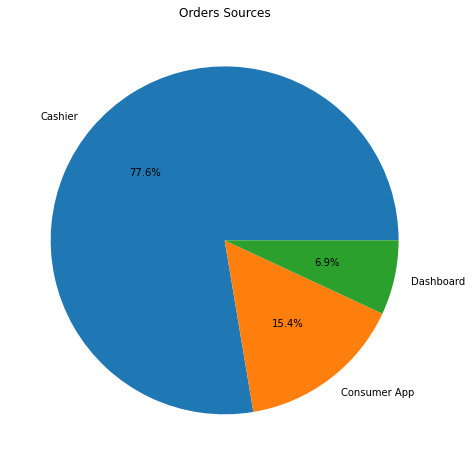

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Orders Sources')
plt.pie(df_Orders_Sheet.source.value_counts(), labels= ['Cashier', 'Consumer App', 'Dashboard'],autopct='%1.1f%%')
plt.show()

# As showen Withi the Figure 

**More than 75% of the Order done from the different Branches**

**Around 15% ordered through customer applications**

**Only 6% done through the Dashboard**

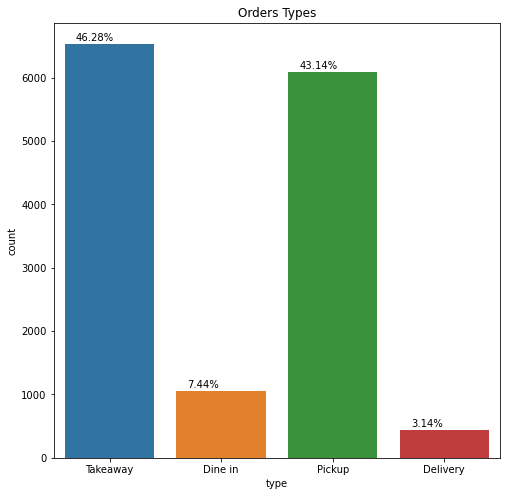

In [ ]:
plt.figure(figsize=(8,8))
pl = sns.countplot(x = 'type', data =df_Orders_Sheet)
plt.title('Orders Types')
for p in pl.patches:
        pl.annotate('{:.2f}%'.format(p.get_height()/len(df_Orders_Sheet)*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

# Orders Types 
**Taking a look to the figure:**

**Less than 4% of Orders are been Delivered**

**Only 7.44% are dine in**
**The mejority of Orders etheir Takeaway or Pickup by more than 40% for each of them**


In [ ]:
print(df_Orders_Sheet["branch name"].value_counts())

Al Malqa                 627
Al Naeem - Jeddah        578
Al Fayha - Jeddah        532
Al Shatee - Dammam       519
Al Wusayta - Hail        477
Al Yarmouk               456
Al Nahda                 428
Al Murooj                415
Al Khuzama - Khobar      399
Al Narjes                396
Al Kharj                 390
Dahrat Laban             379
Al Azizia                369
Al Takhassusi            368
Al Dhabab                359
Al Rayyan - Buraidah     357
Al Jazeerah              350
Al Khaleej               343
Al Izdihar               340
Al Badiah                332
Turki 1st                332
Al Balad - Jubail        330
Al Salam - Mubarraz      329
Al Manar                 328
Qurtaba                  327
Al Uraija                325
Al Natheem               310
Al Shifa                 309
Al Rabie                 305
Irqa                     300
Al Hazm                  292
Al Quds                  278
As Suwaidi Al Gharabi    272
Al Wafa - Unayzah        267
Al Thumama    

**We Could Find out the number of orders ordered by each branch**

Find the branch with the Largest number of Orders  : **Al Malqa** and with least number : **office**

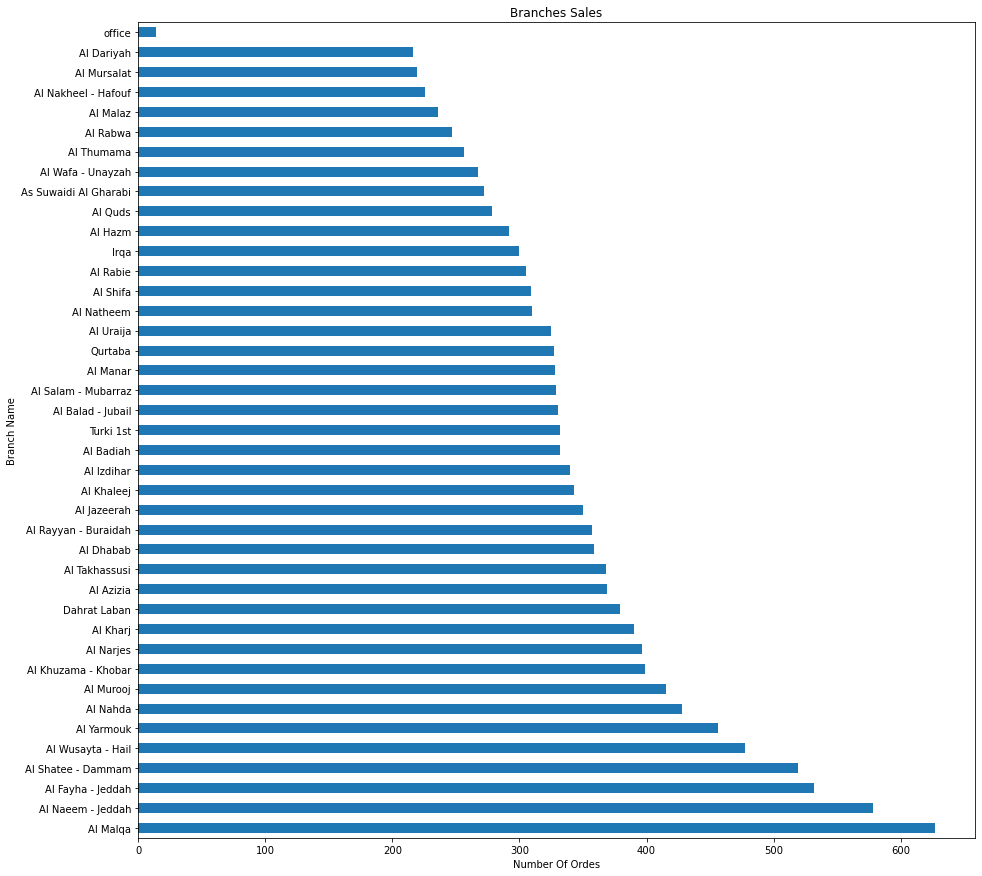

In [ ]:
plt.figure(figsize=(15,15))
df_Orders_Sheet['branch name'].value_counts().plot(kind="barh")
plt.title("Branches Sales")
plt.ylabel("Branch Name")
plt.xlabel("Number Of Ordes")
plt.show()

# Delay Time 

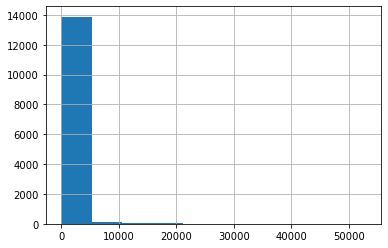

In [ ]:
df_Orders_Sheet["delay seconds"].hist()

The above chart shows that the distribution is **right-skewed**, and there are extreme values at the right of the histogram

The extreme values at the right considered as **Outliers**

In [ ]:
df_Orders_Sheet["delay seconds"].describe()

count    14132.000000
mean       482.978701
std       1757.433573
min          0.000000
25%          0.000000
50%          0.000000
75%        355.000000
max      52954.000000
Name: delay seconds, dtype: float64

# Determine Outlier Range

In [ ]:
Q1 = df_Orders_Sheet["delay seconds"].quantile(0.25)
Q3 = df_Orders_Sheet["delay seconds"].quantile(0.75)
IQR = Q3 - Q1
print("IQR Value : " + str(IQR))
Lowerbound = (Q1 - 1.5 * IQR)
Upperbound = (Q3 + 1.5 * IQR)
print("Upperbound Value : " + str(Upperbound))


IQR Value : 355.0
Upperbound Value : 887.5


In [ ]:
df_Orders_Sheet["delay seconds"].quantile(0.98)

4674.279999999955

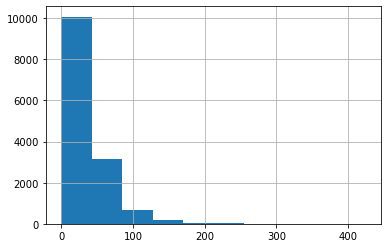

In [ ]:
df_Orders_Sheet["price"].hist()

In [ ]:
df_Orders_Sheet["price"].describe()

count    14132.000000
mean        36.463142
std         29.552715
min          0.000000
25%         19.130000
50%         28.696000
75%         45.217000
max        424.348000
Name: price, dtype: float64

# Total price of Sales for the Business Date

In [ ]:
df_Orders_Sheet["price"].sum()

515297.116

**Total price Sales for each branch Within the Business Date**

In [ ]:
df_Orders_Sheet.groupby('branch name').price.sum()

branch name
Al Azizia                13540.887
Al Badiah                12662.622
Al Balad - Jubail        11424.352
Al Dariyah                7726.102
Al Dhabab                15534.797
Al Fayha - Jeddah        19738.277
Al Hazm                  10950.441
Al Izdihar               12473.932
Al Jazeerah              13786.970
Al Khaleej               13141.755
Al Kharj                 13640.881
Al Khuzama - Khobar      14873.060
Al Malaz                  9481.756
Al Malqa                 24183.494
Al Manar                 11832.183
Al Murooj                14934.798
Al Mursalat               8418.264
Al Naeem - Jeddah        23454.813
Al Nahda                 13720.886
Al Nakheel - Hafouf       6566.973
Al Narjes                15579.145
Al Natheem                9673.929
Al Quds                  10185.227
Al Rabie                 12906.965
Al Rabwa                  8746.962
Al Rayyan - Buraidah     11663.505
Al Salam - Mubarraz      10020.022
Al Shatee - Dammam       17644.380
Al Shifa

by Combaring the total sales price and the branches with the largest number of  orders will find that 

**Al Malqa** achieved the largest salse price

# Total Final Price of Sales for the Business Date

In [ ]:
df_Orders_Sheet["final price"].sum()

593793

In [ ]:
df_Orders_Sheet.groupby('branch name')["final price"].sum()

branch name
Al Azizia                15572
Al Badiah                14589
Al Balad - Jubail        13138
Al Dariyah                8839
Al Dhabab                17902
Al Fayha - Jeddah        22677
Al Hazm                  12593
Al Izdihar               14322
Al Jazeerah              15892
Al Khaleej               15330
Al Kharj                 15664
Al Khuzama - Khobar      17194
Al Malaz                 10904
Al Malqa                 27922
Al Manar                 13637
Al Murooj                17220
Al Mursalat               9718
Al Naeem - Jeddah        27033
Al Nahda                 15809
Al Nakheel - Hafouf       7552
Al Narjes                17923
Al Natheem               11125
Al Quds                  11788
Al Rabie                 14932
Al Rabwa                 10059
Al Rayyan - Buraidah     13412
Al Salam - Mubarraz      11501
Al Shatee - Dammam       20441
Al Shifa                 12672
Al Takhassusi            15112
Al Thumama               10511
Al Uraija                14

In [ ]:
pdf.ProfileReport(df_Orders_Sheet)

# **Check the Order_Tags Sheet Details**

In [ ]:
df_Order_Tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13553 entries, 0 to 13552
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_hid    13553 non-null  object        
 1   tag_hid      13553 non-null  object        
 2   slug         13553 non-null  object        
 3   branch name  13553 non-null  object        
 4   created_at   13553 non-null  datetime64[ns]
 5   updated_at   13553 non-null  datetime64[ns]
 6   None         0 non-null      object        
 7   None         0 non-null      object        
 8   None         0 non-null      object        
 9   None         0 non-null      object        
 10  None         0 non-null      object        
dtypes: datetime64[ns](2), object(9)
memory usage: 1.1+ MB


In [ ]:
df_Order_Tags.isnull().sum()

order_hid          0
tag_hid            0
slug               0
branch name        0
created_at         0
updated_at         0
NaN            13553
NaN            13553
NaN            13553
NaN            13553
NaN            13553
dtype: int64

By Checking the Null Values there are **5 empty columns** at the End Of the sheet

In [ ]:
# Drop these columns from the dataframe
df_Order_Tags.dropna(axis=1, how='all',inplace=True)

In [ ]:
df_Order_Tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13553 entries, 0 to 13552
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_hid    13553 non-null  object        
 1   tag_hid      13553 non-null  object        
 2   slug         13553 non-null  object        
 3   branch name  13553 non-null  object        
 4   created_at   13553 non-null  datetime64[ns]
 5   updated_at   13553 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 635.4+ KB


In [ ]:
print(df_Order_Tags.slug.unique())
print(df_Order_Tags.slug.value_counts())

['Walk-IN' 'HungerStation-App' 'iOS-Order' 'Jahez-App' 'shopx-redeem'
 'Android-Order' 'CareemNOW-App' 'Mrsool' 'ToYou-App' 'hanger-station'
 'hunger-station-app' 'walk-in' 'hungerstation--apps' 'hngerstation-app'
 'hangerr' 'hungerstaion-app' 'creem' 'wellk' 'walk--in' 'coupon-discount'
 'hunger-apps' 'walkin' 'welllk' 'walk---in' 'wkin' 'hungrstation-app'
 'hungerstation-apps' 'hungerstation' 'hungerstation-app'
 'hungerstalon-app' '_67a613a7' 'hungerstationapp' 'hunger-station'
 'hungerstion-app' 'koinks' 'Carriage-App' 'wssel-apps' 'hunger-app'
 'Web-Order' 'Marsool']
Walk-IN                5433
HungerStation-App      3304
iOS-Order              1440
Jahez-App               731
hanger-station          628
Android-Order           390
Mrsool                  356
hunger-station-app      292
walk-in                 161
CareemNOW-App           153
hungerstation-apps      131
ToYou-App                96
walk--in                 82
wkin                     47
hngerstation-app         45
s

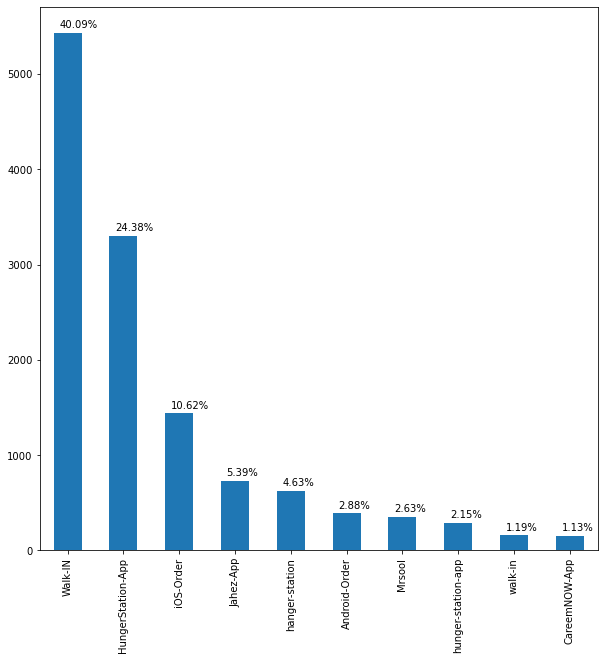

In [ ]:
plt.figure(figsize=(10,10))
pl=df_Order_Tags.slug.value_counts().nlargest(10).plot(kind='bar')
for p in pl.patches:
        pl.annotate('{:.2f}%'.format(p.get_height()/len(df_Order_Tags)*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

 # Depending on the above statistics Mosts of Orders are Ordered within 

**Branches (Walk-IN) >> 40%**

**HungerStation-App  >> 24%**

**iOS-Order           >> 10.6%**

# Order_Product Sheet Details

In [ ]:
df_Order_Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41566 entries, 0 to 41565
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_product_hid    41566 non-null  object        
 1   product_hid          41566 non-null  object        
 2   product_size_hid     41566 non-null  object        
 3   order_hid            41566 non-null  object        
 4   branch_hid           41566 non-null  object        
 5   discount_hid         0 non-null      object        
 6   original price       41566 non-null  float64       
 7   quantity             41566 non-null  int64         
 8   final price          41566 non-null  float64       
 9   cost                 41566 non-null  float64       
 10  returned quantity    41566 non-null  int64         
 11  status               41534 non-null  object        
 12  notes                405 non-null    object        
 13  actual_date          41566 non-

In [ ]:
df_Order_Product.nunique()

order_product_hid      41566
product_hid               88
product_size_hid         102
order_hid              14132
branch_hid                41
discount_hid               0
original price            30
quantity                  14
final price              137
cost                     275
returned quantity          6
status                     3
notes                    193
actual_date            25519
kitchen_received_at    12685
kitchen_done_at        10504
delay_in_seconds        3125
void_reason               10
discount name              0
product name              88
size name                  0
branch name               41
kitchen times              1
created_at             12373
updated_at             12426
dtype: int64

In [ ]:
del_col = ['kitchen times','size name','discount name', 'discount_hid']
df_Order_Product.drop(del_col, axis=1, inplace=True)

In [ ]:
df_Order_Product.nunique()

order_product_hid      41566
product_hid               88
product_size_hid         102
order_hid              14132
branch_hid                41
original price            30
quantity                  14
final price              137
cost                     275
returned quantity          6
status                     3
notes                    193
actual_date            25519
kitchen_received_at    12685
kitchen_done_at        10504
delay_in_seconds        3125
void_reason               10
product name              88
branch name               41
created_at             12373
updated_at             12426
dtype: int64

**Get the Total Amount of products per day**

In [ ]:
df_Order_Product.quantity.sum()

54603

**Total Final Price for all products per day**

In [ ]:
df_Order_Product["final price"].sum()

520816.667

**The most 10 used Product**

In [ ]:
df_Order_Product.groupby('product name').quantity.sum().nlargest(10)

product name
The Second Single Hamburgini for 1 SAR    7880
Single Hamburgini.                        3817
Coca-Cola Can 330ml.                      3459
Thin Fries.                               3003
Thin Fries                                2538
Coca Cola                                 2358
Double Hamburgini.                        1697
Double Tender Sandwich.                   1512
Cheese Fries                              1168
Fresh Cut Fries                           1164
Name: quantity, dtype: int64

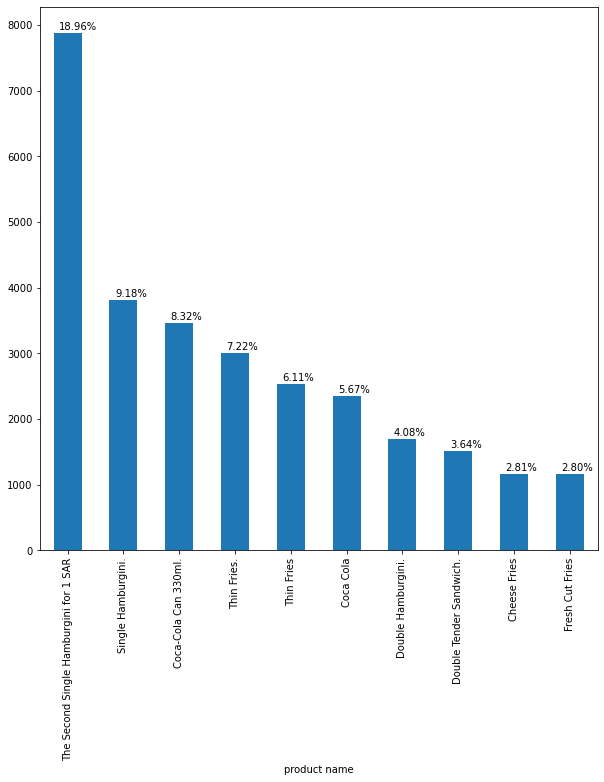

In [ ]:
plt.figure(figsize=(10,10))
pl=df_Order_Product.groupby('product name').quantity.sum().nlargest(10).plot(kind='bar')
for p in pl.patches:
        pl.annotate('{:.2f}%'.format(p.get_height()/len(df_Order_Product)*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

**The Most Product used by each branch**

In [ ]:
df_Order_Product.groupby(['branch name','product name']).quantity.sum().nlargest(10)

branch name            product name                          
Al Naeem - Jeddah      The Second Single Hamburgini for 1 SAR    355
Al Malqa               The Second Single Hamburgini for 1 SAR    352
Al Rayyan - Buraidah   The Second Single Hamburgini for 1 SAR    281
Al Fayha - Jeddah      The Second Single Hamburgini for 1 SAR    273
Al Murooj              The Second Single Hamburgini for 1 SAR    258
Al Salam - Mubarraz    The Second Single Hamburgini for 1 SAR    253
Al Khuzama - Khobar    The Second Single Hamburgini for 1 SAR    248
As Suwaidi Al Gharabi  The Second Single Hamburgini for 1 SAR    247
Al Malqa               Single Hamburgini.                        239
Al Yarmouk             The Second Single Hamburgini for 1 SAR    239
Name: quantity, dtype: int64

# Order_Options Sheet Details


In [ ]:
df_Order_Options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13147 entries, 0 to 13146
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   order_product_hid          13147 non-null  object 
 1   order_product_option_hid   13147 non-null  object 
 2   original price             13147 non-null  float64
 3   quantity                   13147 non-null  int64  
 4   final price                13147 non-null  float64
 5   cost                       13147 non-null  float64
 6   order_product_option_name  13147 non-null  object 
 7   None                       0 non-null      object 
 8   None                       0 non-null      object 
 9   None                       0 non-null      object 
 10  None                       0 non-null      object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.1+ MB


**Dropping  None Columns**

In [ ]:
df_Order_Options.dropna(axis=1, how='all',inplace=True)

In [ ]:
df_Order_Options.nunique()

order_product_hid            9404
order_product_option_hid       53
original price                  5
quantity                        8
final price                    13
cost                          156
order_product_option_name      46
dtype: int64

**Total Final Price**

In [ ]:
df_Order_Options["final price"].sum()

4049.2360000000003

**Total Quantity for all Product Option**

In [ ]:
df_Order_Options.quantity.sum()

20427

**Total Final Price for Each Product Option**

In [ ]:
df_Order_Options.groupby(['order_product_option_name'])["final price"].sum().nlargest(10)

order_product_option_name
Extra Cheese Slice      1489.081
Caramelized Onion       1017.325
Mushrooms                582.566
Jalapeno                 578.460
Ranch Sauce              144.392
Extra Patty              109.558
Hamburgini Mix Sauce      87.856
Cheedar Cheese            20.868
Mushroom                  10.434
Patty                      8.696
Name: final price, dtype: float64

**Most Product Option Used**

In [ ]:
df_Order_Options.groupby(['order_product_option_name']).quantity.sum().nlargest(10)

order_product_option_name
Single Hamburgini         12231
Thin Fries                 1324
Extra Cheese Slice         1322
5 Hamburgini Tenders        697
Light BBQ Sauce             590
Jalapeno                    565
Caramelized Onion           454
2x light BBQ Sauce          402
Mushrooms                   283
Dynamite Chicken Bites      244
Name: quantity, dtype: int64

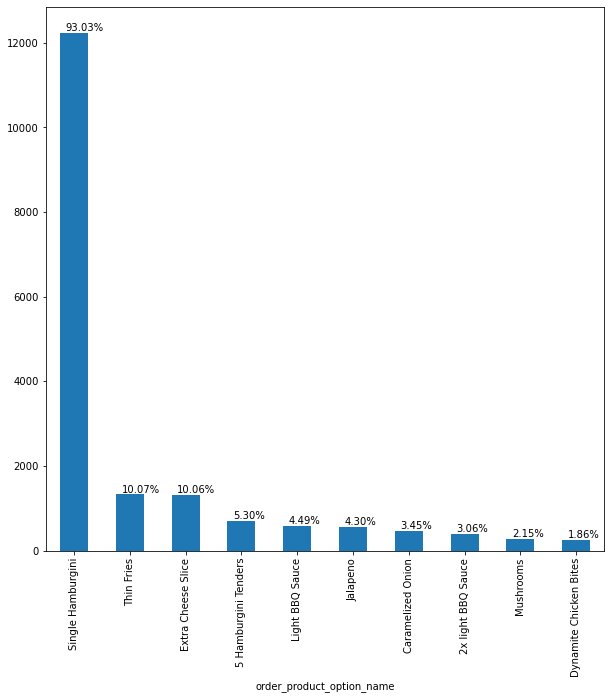

In [ ]:
plt.figure(figsize=(10,10))
pl=df_Order_Options.groupby(['order_product_option_name']).quantity.sum().nlargest(10).plot(kind='bar')
for p in pl.patches:
        pl.annotate('{:.2f}%'.format(p.get_height()/len(df_Order_Options)*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()

**As showen within the graph The Most used product option :  Single Hamburgini**

# Order_Payments Sheet Details

In [ ]:
df_Order_Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14185 entries, 0 to 14184
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   payment_hid          14185 non-null  object        
 1   payment_method_hid   14185 non-null  object        
 2   order_hid            14185 non-null  object        
 3   employee_hid         14185 non-null  object        
 4   branch_hid           14185 non-null  object        
 5   business_date        14185 non-null  datetime64[ns]
 6   amount               14185 non-null  int64         
 7   tendered             14185 non-null  int64         
 8   actual_date          14185 non-null  datetime64[ns]
 9   order_reference      14185 non-null  object        
 10  order number         14185 non-null  object        
 11  payment method name  14185 non-null  object        
 12  employee name        14185 non-null  object        
 13  branch name          14185 non-

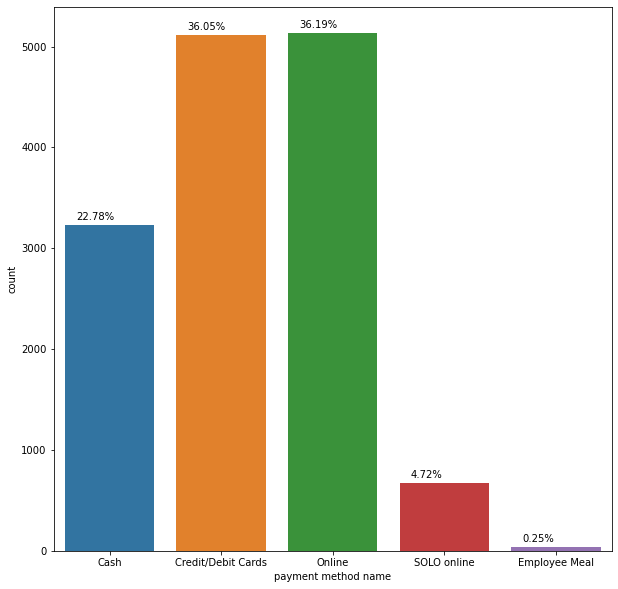

In [ ]:
plt.figure(figsize=(10,10))
pl = sns.countplot(x = 'payment method name', data =df_Order_Payments)
for p in pl.patches:
        pl.annotate('{:.2f}%'.format(p.get_height()/len(df_Order_Payments)*100), (p.get_x()+0.1, p.get_height()+50))
plt.show()
